<a href="https://colab.research.google.com/github/Taejin1221/Lab_Experiment/blob/main/Trajectory_Clustering/Trajectory_Clustering_28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load modules and Set constants

In [ ]:
import os, cv2, glob
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
WIDTH, HEIGHT = 8, 8
CONCAT_WIDTH, CONCAT_HEIGHT = WIDTH + WIDTH, HEIGHT

EXPERIMENT_DATA = {
    'name' : 'Trajectory_Clusetring',
    'number' : '28',
    'date' : '07-08-2021',
    'description' : 'Clustering with DNN\n' + 'Last layer\'s activation is None\n'
    }

ROOT_DIR = os.path.join('/content')

DATA_DIR = os.path.join(ROOT_DIR, 'Bitmap')

EXPERIMENT_DIR = os.path.join(ROOT_DIR, 'drive', 'MyDrive', 'University', 'PiLab', 'Experiment')
RESULT_DIR = os.path.join(EXPERIMENT_DIR, 'Results')

os.chdir(RESULT_DIR)
curr_result_name = f"{EXPERIMENT_DATA['name']}_{EXPERIMENT_DATA['number']}_{EXPERIMENT_DATA['date']}_Data"
if (curr_result_name not in os.listdir()):
    os.mkdir(curr_result_name)

CURR_RESULT_DIR = os.path.join(RESULT_DIR, curr_result_name)
os.chdir(CURR_RESULT_DIR)

with open('Description.txt', 'w') as f:
    f.write(EXPERIMENT_DATA['description'])

print(f'ROOT_DIR:        {ROOT_DIR}')
print(f'DATA_DIR:        {DATA_DIR}')
print(f'EXPERIMENT_DIR:  {EXPERIMENT_DIR}')
print(f'RESULT_DIR:      {RESULT_DIR}')
print(f'CURR_RESULT_DIR: {CURR_RESULT_DIR}')

ROOT_DIR:        /content
DATA_DIR:        /content/Bitmap
EXPERIMENT_DIR:  /content/drive/MyDrive/University/PiLab/Experiment
RESULT_DIR:      /content/drive/MyDrive/University/PiLab/Experiment/Results
CURR_RESULT_DIR: /content/drive/MyDrive/University/PiLab/Experiment/Results/Trajectory_Clusetring_28_07-08-2021_Data


# Load Bitmaps

In [ ]:
import zipfile

os.chdir(ROOT_DIR)
zipfile.ZipFile("Bitmap.zip").extractall()

In [ ]:
os.chdir(DATA_DIR)
print(sorted(glob.glob('*png'))[:10])

['0th data.png', '1000000th data.png', '1000064th data.png', '1000128th data.png', '1000192th data.png', '1000256th data.png', '1000320th data.png', '100032th data.png', '1000384th data.png', '1000448th data.png']


<Figure size 432x288 with 0 Axes>

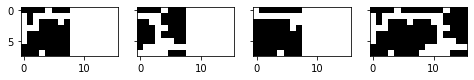

In [ ]:
os.chdir(DATA_DIR)

file_names = list(sorted(glob.glob('*png')))

bitmap_data = [ ]
for file in file_names:
    bitmap_data.append(cv2.imread(file, cv2.IMREAD_GRAYSCALE))

plt.gray()
fig, ax = plt.subplots(1, 4, sharex = True, sharey = True, figsize = (8, 64))
ax[0].imshow(bitmap_data[0])
ax[1].imshow(bitmap_data[1])
ax[2].imshow(bitmap_data[2])
ax[3].imshow(cv2.hconcat([bitmap_data[0], bitmap_data[1]]))

plt.show()

In [ ]:
len(bitmap_data)

18670

# Create Dataset

In [ ]:
X_TRAIN_SIZE = 100
X_TEST_SIZE = 10

X_train, Y_train = [ ], [ ]
for i in range(X_TRAIN_SIZE):
    for j in range(X_TRAIN_SIZE):
        X_train.append(cv2.hconcat([bitmap_data[i], bitmap_data[j]]))
        if (i == j):
            Y_train.append(1)
        else:
            Y_train.append(0)

for i in range(X_TRAIN_SIZE + X_TEST_SIZE, X_TRAIN_SIZE + X_TEST_SIZE + 10_000):
    X_train.append(cv2.hconcat([bitmap_data[i], bitmap_data[i]]))
    Y_train.append(1)

X_test, Y_test = [ ], [ ]
for i in range(X_TRAIN_SIZE, X_TRAIN_SIZE + X_TEST_SIZE):
    for j in range(X_TRAIN_SIZE, X_TRAIN_SIZE + X_TEST_SIZE):
        X_test.append(cv2.hconcat([bitmap_data[i], bitmap_data[j]]))
        if (i == j):
            Y_test.append(1)
        else:
            Y_test.append(0)

for i in range(X_TRAIN_SIZE + X_TEST_SIZE + 10_000, X_TRAIN_SIZE + X_TEST_SIZE + 10_000 + 100):
    X_test.append(cv2.hconcat([bitmap_data[i], bitmap_data[i]]))
    Y_test.append(1)

In [ ]:
X_train = np.array(X_train).astype('float32') / 255.
X_train = np.reshape(X_train, (-1, CONCAT_HEIGHT * CONCAT_WIDTH))

X_test = np.array(X_test).astype('float32') / 255
X_test = np.reshape(X_test, (-1, CONCAT_HEIGHT * CONCAT_WIDTH))

Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(20000, 128) (20000,)
(200, 128) (200,)


# Construct Network

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
NEURON_NUMBER = 64

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(NEURON_NUMBER, 'relu', input_shape = (128, )))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(NEURON_NUMBER, 'relu'))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(NEURON_NUMBER, 'relu'))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(NEURON_NUMBER, 'relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4

In [ ]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(X_train, Y_train, epochs = 50, batch_size = 128)

Epoch 1/50
157/157 [==============================] - 1s 2ms/step - loss: 0.5642 - acc: 0.6849
Epoch 2/50
157/157 [==============================] - 0s 2ms/step - loss: 0.1881 - acc: 0.9258
Epoch 3/50
157/157 [==============================] - 0s 3ms/step - loss: 0.0682 - acc: 0.9765
Epoch 4/50
157/157 [==============================] - 0s 2ms/step - loss: 0.0360 - acc: 0.9884
Epoch 5/50
157/157 [==============================] - 0s 2ms/step - loss: 0.0233 - acc: 0.9926
Epoch 6/50
157/157 [==============================] - 0s 3ms/step - loss: 0.0196 - acc: 0.9945
Epoch 7/50
157/157 [==============================] - 0s 2ms/step - loss: 0.0165 - acc: 0.9948
Epoch 8/50
157/157 [==============================] - 0s 2ms/step - loss: 0.0136 - acc: 0.9963
Epoch 9/50
157/157 [==============================] - 0s 2ms/step - loss: 0.0126 - acc: 0.9968
Epoch 10/50
157/157 [==============================] - 0s 2ms/step - loss: 0.0118 - acc: 0.9974
Epoch 11/50
157/157 [============================

In [ ]:
score = model.evaluate(X_test, Y_test)
print(score)

7/7 [==============================] - 0s 2ms/step - loss: 3.4120e-04 - acc: 1.0000
[0.00034119506017304957, 1.0]


tf.Tensor([[1.]], shape=(1, 1), dtype=float32)


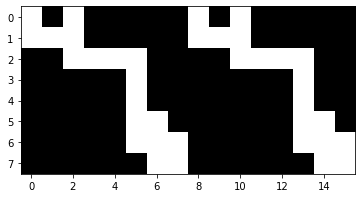

In [ ]:
print(model(X_test[0:1]))
plt.imshow(np.reshape(X_test[0:1], (8, 16)))
plt.show()

tf.Tensor([[0.]], shape=(1, 1), dtype=float32)


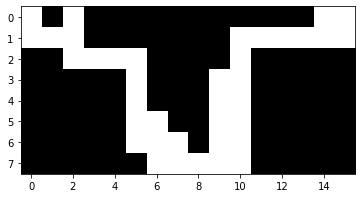

In [ ]:
print(model(X_test[1:2]))
plt.imshow(np.reshape(X_test[1:2], (8, 16)))
plt.show()

tf.Tensor([[1.0444672e-22]], shape=(1, 1), dtype=float32)


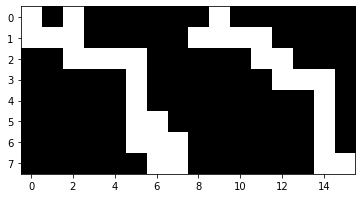

In [ ]:
test = X_test[5:6]
print(model(test))
plt.imshow(np.reshape(test, (8, 16)))
plt.show()

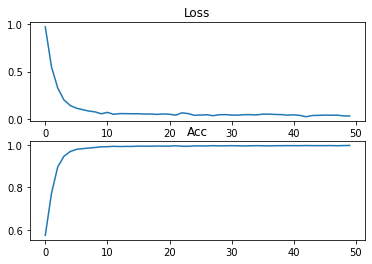

In [ ]:
os.chdir(CURR_RESULT_DIR)

model.save('model.h5')

fig, ax = plt.subplots(2, 1)
ax[0].plot(history.history['loss'])
ax[0].set_title('Loss')

ax[1].plot(history.history['acc'])
ax[1].set_title('Acc')

plt.savefig('result' + '.png')
plt.show()